### User Engagement Analysis - Data Analyst @ Showwcase
### Ruizhi Ma

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import scipy.spatial.distance as scipydist
import matplotlib.pyplot as plt

In [33]:
sessions = pd.read_csv('showwcase_sessions.csv')
sessions.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [34]:
sessions.shape

(302, 14)

In [35]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [60]:
sessions.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,active_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333,453.830000
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138,1046.406052
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-2085.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000,-227.750000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000,483.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000,1264.250000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000,2381.000000


### Data Preprocess

In [37]:
sessions.isna().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [38]:
#As there is little number of null values in the dataset, the best way to handle missing data is drop the N/A rows.
sessions.dropna()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,10/1/19,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0


### Sessions

Text(0.5, 1.0, 'Engagement by date in October')

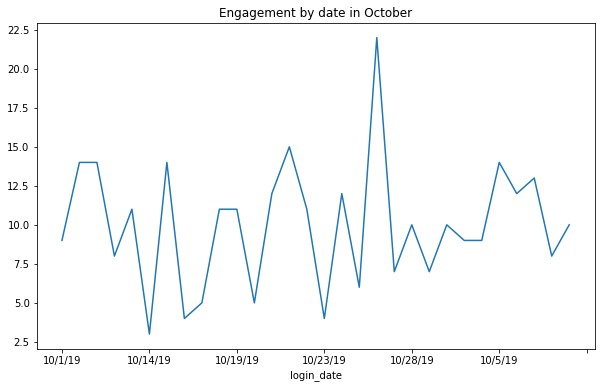

In [39]:
Engagement = sessions.groupby('login_date')['session_id'].count()
Engagement.plot(kind='line', figsize=(10,6))
plt.title('Engagement by date in October')

In [40]:
print('unique user:', sessions['customer_id'].nunique())
print('unique session:', sessions['session_id'].nunique())

unique user: 48
unique session: 300


### Bounce Rate

In [59]:
sessions['active_duration'] = sessions['session_duration']- sessions['inactive_duration']
sessions.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,active_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,418.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,1633.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,659.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,274.0


In [63]:
#I found that some active durations were less then 0, which indicated data integrity problem since inactive duration should always less then total session_duration.
error = sessions[sessions['active_duration'] < 0]['session_id'].nunique()
print('Number of error sessions:',error)

Number of error sessions: 88


In [65]:
bounce = sessions[(sessions['active_duration'] < 30) & (sessions['active_duration'] > 0)]
bounce['session_id'].count()/sessions['session_id'].count()

0.02666666666666667

### Conversion

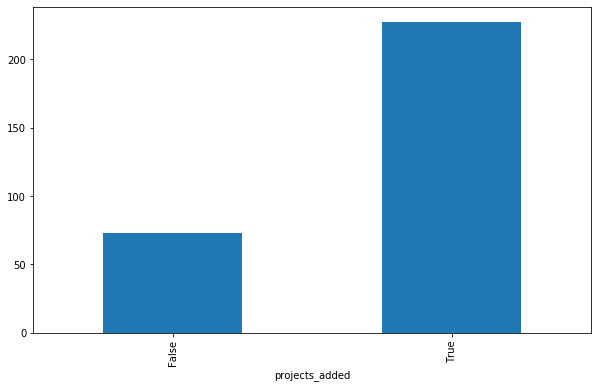

In [41]:
sessions.groupby('projects_added').size().plot(kind='bar', figsize=(10,6))

In [17]:
sessions.groupby('likes_given').size()

likes_given
False     87
True     213
dtype: int64

In [19]:
sessions.groupby('comment_given').size()

comment_given
False     75
True     225
dtype: int64

In [42]:
sessions.groupby('projects_added').size()

projects_added
False     73
True     227
dtype: int64

In [ ]:
single = store[(store['Homeowner'] == 'Y' ) & (store['MaritalStatus'] == 'S') & (store['Gender'] == 'F')]

In [56]:
conversion = sessions[(sessions['likes_given'] == True) & (sessions['comment_given'] == True) & (sessions['projects_added'] == True) &(sessions['inactive_status'] == False)]
conversion.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
18,614943.0,14354.0,10/28/19,True,True,True,False,False,2.0,21.0,4.0,0.0,0.0,505.0
19,590435.0,43549.0,10/28/19,True,True,True,False,True,1.0,5.0,1.0,0.0,3.0,878.0
20,211059.0,39475.0,10/28/19,True,True,True,False,False,2.0,4.0,1.0,0.0,0.0,378.0
22,636263.0,87323.0,10/28/19,True,True,True,False,True,1.0,8.0,5.0,0.0,2.0,1346.0


In [55]:
conversion['session_id'].count()/sessions['session_id'].count()

0.19333333333333333

In [57]:
conversion['customer_id'].nunique()/sessions['customer_id'].nunique()

0.5416666666666666

In [74]:
(sessions.groupby('bug_occured').size()/sessions['session_id'].count())*100

bug_occured
False    61.333333
True     38.666667
dtype: float64

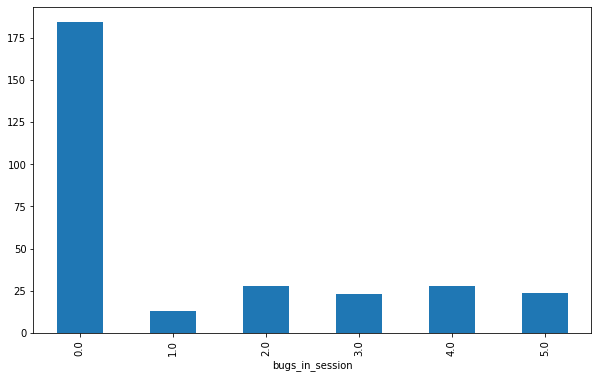

In [67]:
sessions.groupby('bugs_in_session').size().plot(kind='bar', figsize=(10,6))